In [1]:
import numpy as np

from def_entities import Attractor

from mod_updates import *
from mod_operations import check_state, generate_new_state, find_attractor

In [8]:
# Total number of monte-carlo iterations
N = 300
# Global variables
n = 60
tol = 1e-6

saturation = 2.0 / 3.0
s = np.ones(5)
for i in range(1, 5):
  s[i] = 2 * saturation / (i+1)
print(s)

[1.         0.66666667 0.44444444 0.33333333 0.26666667]


In [3]:
slowidx = np.array([3,5,11,13,16,20,21,23,24,25,44,46,47,48,49,51,59]) - 1
fastidx = np.array([2,7,14,18,19,22,26,29,30,35,36,40,41,45,50,54,55,56]) - 1

In [4]:
all_states = []

for i in range(N):
  new_state = generate_new_state(n, slowidx, fastidx)
  attractor_candidate = find_attractor(new_state, s, tol)
  all_states.append(attractor_candidate)

all_attractors = [Attractor(all_states[0])]

for state in all_states:
  if not check_state(state, all_attractors, atol=1e-2):
    # Found new attractor
    all_attractors.append(Attractor(state, freq=1))
  else:
    pass

In [5]:
# Some plots

2
[0.0, 1.0, 0.0, 0.16532493863784234]
[0.0, 8.147430245173628e-12, 1.086945179030425e-06, 1.060826692300906e-06]
1
2


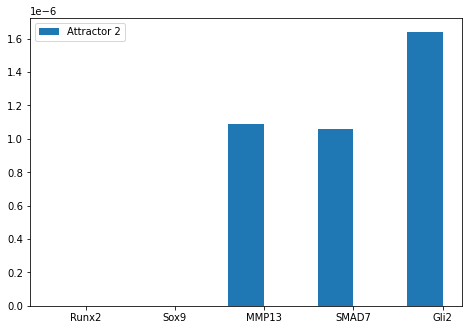

In [7]:
import matplotlib.pyplot as plt

print(len(all_attractors))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
markers = ["Runx2", "Sox9", "MMP13", "SMAD7", "Gli2"]
X = np.arange(len(markers))
#for i, attractor in enumerate(all_attractors):
print([all_attractors[0].state[0, 8], all_attractors[0].state[0, 9], all_attractors[0].state[0, 23],all_attractors[0].state[0, 24]])
print([all_attractors[1].state[0, 8], all_attractors[1].state[0, 9], all_attractors[1].state[0, 23],all_attractors[1].state[0, 24]])
print([all_attractors[2].state[0, 8], all_attractors[2].state[0, 9], all_attractors[2].state[0, 23],all_attractors[2].state[0, 24]])

#ax.bar(X-.5, [all_attractors[0].state[0, 8], all_attractors[0].state[0, 9], all_attractors[0].state[0, 23], all_attractors[0].state[0, 24]], width=0.2, label="Attractor 1")
ax.bar(X-0.2, [all_attractors[1].state[0, 8], all_attractors[1].state[0, 9], all_attractors[1].state[0, 23], all_attractors[1].state[0, 24], all_attractors[1].state[0,5]], width=0.4, label="Attractor 2")
ax.bar(X+0.2, [all_attractors[2].state[0, 8], all_attractors[2].state[0, 9], all_attractors[2].state[0, 23], all_attractors[2].state[0, 24], all_attractors[2].state[0,5]], width=0.4, label="Attractor 3")
plt.legend()
plt.xticks(X, markers)

plt.savefig("attractors.png", transparent=True, dpi=200.0, bbox_inches="tight")

for at in all_attractors:
  print(at.freq)